In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


# Visualizing the data

In [2]:
df.shape

(346, 10)

In [3]:
df_rates=df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'education','Gender','effective_date','due_date','loan_status'], axis=1)

In [4]:
df_rates.head()

,Principal,terms,age
0,1000,30,45
1,1000,30,33
2,1000,15,27
3,1000,30,28
4,1000,30,29


In [5]:
df_rates.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


In [6]:
# Code Cell 4
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

def scatter_view(x, y, z, azim, elev):
    # Init figure and axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig,auto_add_to_figure=False)
    fig.add_axes(ax)
    
    # Compute scatter plot
    ax.scatter(x, y, z)
    ax.set_xlabel('age', fontsize=16)
    ax.set_ylabel('terms', fontsize=16)
    ax.set_zlabel('Principal', fontsize=16)
    
    # Specify azimuth
    # and elevation
    ax.azim = azim
    ax.elev = elev
    
xi = df_rates['age']
yi = df_rates['terms']
zi = df_rates['Principal']
interact(lambda azim, elev: scatter_view(xi, yi, zi, azim, elev),
         azim=(0, 90), elev=(0, 90))
plt.show()

interactive(children=(IntSlider(value=45, description='azim', max=90), IntSlider(value=45, description='elev',…

# Visualing the alarm rate

In [7]:
mu = df_rates.mean()
euclid_sq = np.square(df_rates - mu).sum(axis=1)
euclid = np.sqrt(euclid_sq)

In [8]:
max_euclid = euclid.max()
nmd_euclid = [float(x)/max_euclid for x in euclid]

In [9]:
ecl_alarm_rate = []
nmd_range = np.linspace(0, 1, 400)
for nmd_decision in nmd_range:
   
    num_fail = (nmd_euclid > nmd_decision).sum()
    ecl_alarm_rate.append(float(num_fail) / len(euclid))

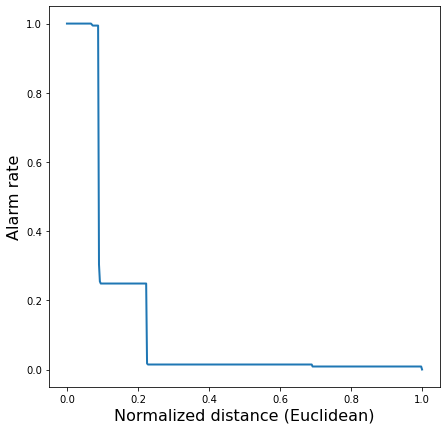

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
plt.plot(nmd_range, ecl_alarm_rate, linewidth=2)
plt.xlabel('Normalized distance (Euclidean)', fontsize=16)
plt.ylabel('Alarm rate', fontsize=16)
plt.show()

In [11]:
threshold = 0.1
index, ecl_threshold = next(tpl for tpl in enumerate(ecl_alarm_rate) if tpl[1] < threshold)
ecl_decision = nmd_range[index]

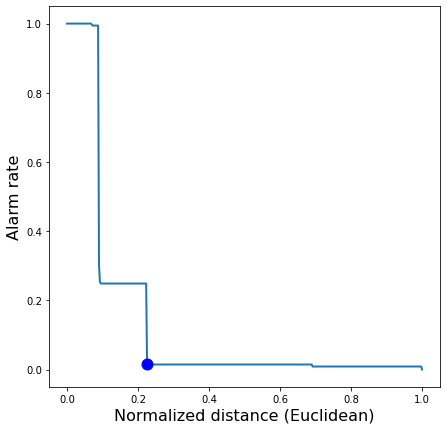

In [12]:
# Alarm rate with decision boundary
fig = plt.figure(figsize=(7, 7))
# SOLUTION:
# Plot the alarm rate as a function of the normalized euclidean distance
plt.plot(nmd_range, ecl_alarm_rate, linewidth=2)
# Plot the chosen decision threshold and the curresponding alarm rate
plt.plot(ecl_decision, ecl_threshold, 'bo', markersize=11)

plt.xlabel('Normalized distance (Euclidean)', fontsize=16)
plt.ylabel('Alarm rate', fontsize=16)
plt.show()

# Visualize Decsion Boundary in 3D

In [13]:
radius = ecl_decision * max_euclid
phi = np.linspace(0, 2 * np.pi, 300)
theta = np.linspace(0, 2 * np.pi, 300)

# Decision sphere (Cartesian coordinates)
xs = radius * np.outer(np.sin(theta), np.cos(phi))
ys = radius * np.outer(np.sin(theta), np.sin(phi))
zs = radius * np.outer(np.cos(theta), np.ones(np.size(phi)))

# Center decision sphere at mean
ecl_xd = xs + df_rates['age'].mean()
ecl_yd = ys + df_rates['terms'].mean()
ecl_zd = zs + df_rates['Principal'].mean()

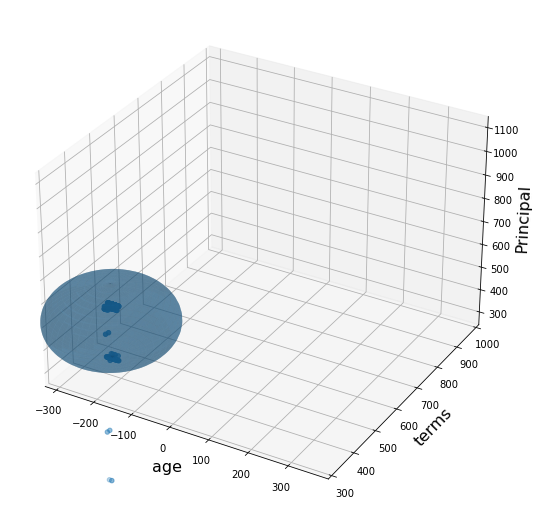

In [14]:

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)

# Plot data
ax.scatter(df_rates['age'],
           df_rates['terms'], 
           df_rates['Principal'])

# Plot decision boundary
ax.plot_surface(ecl_xd, ecl_yd, ecl_zd,
                linewidth=0, alpha=0.25)

# Label axes
ax.set_xlabel('age', fontsize=16)
ax.set_ylabel('terms', fontsize=16)
ax.set_zlabel('Principal', fontsize=16)

extremes = []
extremes.append([df_rates['age'].min(),
                 df_rates['age'].max()])
extremes.append([df_rates['terms'].min(),
                 df_rates['terms'].max()])
extremes.append([df_rates['Principal'].min(),
                 df_rates['Principal'].max()])

# Half-widths and mid-points
hwidths = [(row[1] - row[0]) / 2.0 for row in extremes]
midpts = [(row[1] + row[0]) / 2.0 for row in extremes]

# Set xlim, ylim, zlim
left_ends = midpts - np.max(hwidths)
right_ends = midpts + np.max(hwidths)
ax.set_xlim([left_ends[0], right_ends[0]]);
ax.set_ylim([left_ends[1], right_ends[1]]);
ax.set_ylim([left_ends[2], right_ends[2]]);

# Deduction

### There anomalies where prinicpal is below 300 and below 300 